<a href="https://colab.research.google.com/github/Muku2003-code/Credit-Card-Customer-Analytics/blob/main/credit_card_customer_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
df = pd.read_csv("/content/Credit Card Customer Data.csv")

# First look
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.shape


(660, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
df.isnull().sum()


,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns


Index(['sl_no', 'customer_key', 'avg_credit_limit', 'total_credit_cards',
       'total_visits_bank', 'total_visits_online', 'total_calls_made'],
      dtype='object')

In [ ]:
df.columns


Index(['sl_no', 'customer_key', 'avg_credit_limit', 'total_credit_cards',
       'total_visits_bank', 'total_visits_online', 'total_calls_made'],
      dtype='object')

In [ ]:
df = df.drop(columns=['sl_no'])


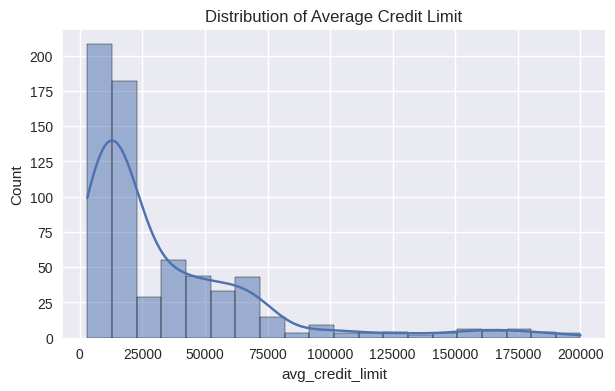

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['avg_credit_limit'], bins=20, kde=True)
plt.title("Distribution of Average Credit Limit")
plt.show()


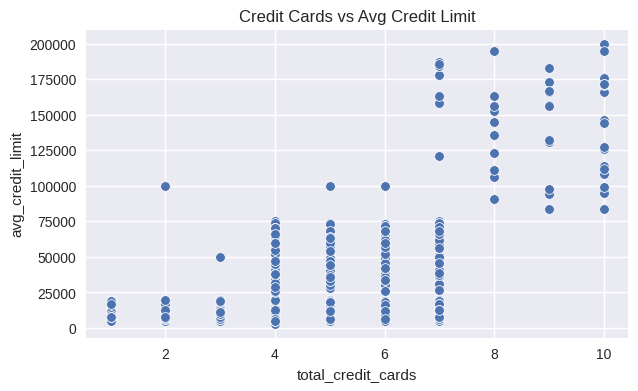

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='total_credit_cards',
    y='avg_credit_limit'
)
plt.title("Credit Cards vs Avg Credit Limit")
plt.show()


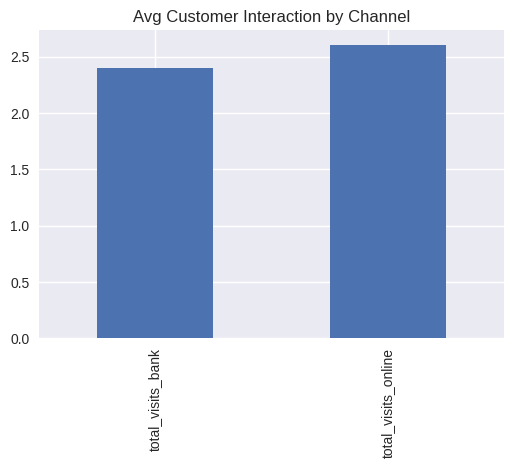

In [ ]:
df[['total_visits_bank', 'total_visits_online']].mean().plot(
    kind='bar',
    title='Avg Customer Interaction by Channel',
    figsize=(6,4)
)
plt.show()


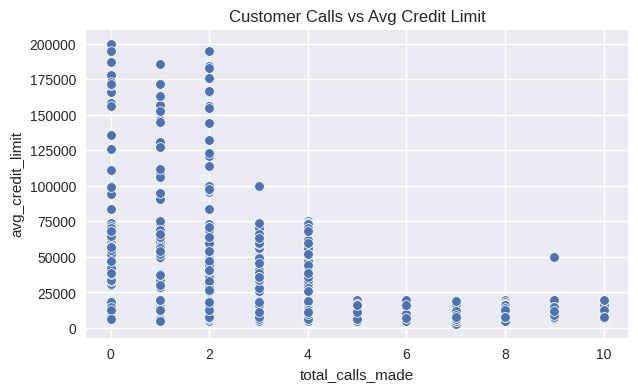

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x='total_calls_made',
    y='avg_credit_limit'
)
plt.title("Customer Calls vs Avg Credit Limit")
plt.show()


In [ ]:
df['engagement_level'] = 'Low'

df.loc[
    (df['total_visits_online'] > df['total_visits_online'].median()) &
    (df['total_calls_made'] < df['total_calls_made'].median()),
    'engagement_level'
] = 'Digital Preferred'

df.loc[
    (df['total_visits_bank'] > df['total_visits_bank'].median()),
    'engagement_level'
] = 'Branch Dependent'

df['engagement_level'].value_counts()


,count
engagement_level,
Low,321
Branch Dependent,290
Digital Preferred,49


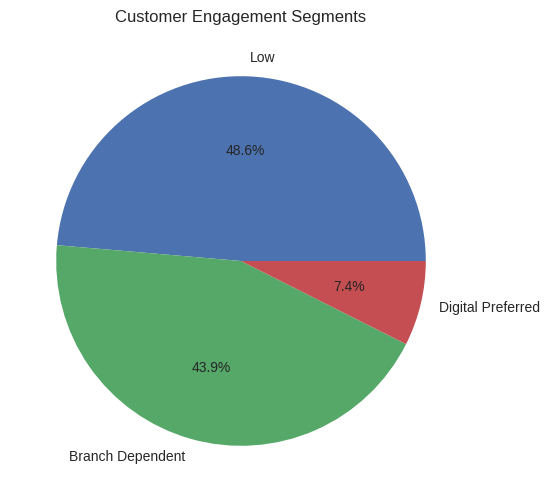

In [ ]:
df['engagement_level'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='Customer Engagement Segments'
)
plt.ylabel("")
plt.show()


In [ ]:
high_value = df[
    df['avg_credit_limit'] > df['avg_credit_limit'].quantile(0.75)
]

high_value.head()


,customer_key,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,engagement_level
0,87073,100000,2,1,1,0,Low
1,38414,50000,3,0,10,9,Low
2,17341,50000,7,1,3,4,Low
4,47437,100000,6,0,12,3,Low
6,48370,100000,5,0,11,2,Digital Preferred


In [ ]:
print("High Value Customers:", high_value.shape[0])


High Value Customers: 164


In [ ]:
df.to_csv("processed_credit_card_customer_behavior.csv", index=False)
